In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")


In [23]:
df = pd.read_csv(r"Z:\ML\Titanic\titanic\train.csv")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [24]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [25]:
df["Age"] = df["Age"].astype(int)

In [29]:
df_new = df[["Age","Fare","Survived"]]
df_new.head(2)

,Age,Fare,Survived
0,22,7.2500,0
1,38,71.2833,1


### train_test_split

In [47]:
from sklearn.model_selection  import train_test_split
X  = df_new.drop(columns=["Survived"])
y = df_new["Survived"]

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [67]:
dtc = DecisionTreeClassifier()
lgr = LogisticRegression()

# DecisionTree
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
accuracy_score(y_test,y_pred)

0.6703910614525139

In [68]:
# logisticregression
lgr.fit(X_train,y_train)
y_pred1 = lgr.predict(X_test)
accuracy_score(y_test,y_pred1)

0.6480446927374302

### Scale value

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 

In [80]:
transf =  ColumnTransformer(transformers=[("scale",StandardScaler(),slice(0,1))])

X_train_scale = transf.fit_transform(X_train) 
X_test_scale = transf.transform(X_test)

In [81]:
# DecisionTree after scale value

dtc.fit(X_train_scale,y_train)
y_pred = dtc.predict(X_test_scale)
accuracy_score(y_pred,y_test)

0.553072625698324

In [82]:
# logisticregression after scale value
lgr.fit(X_train_scale,y_train)
y_pred = lgr.predict(X_test_scale)
accuracy_score(y_pred,y_test)

0.5865921787709497

### Feature Transform

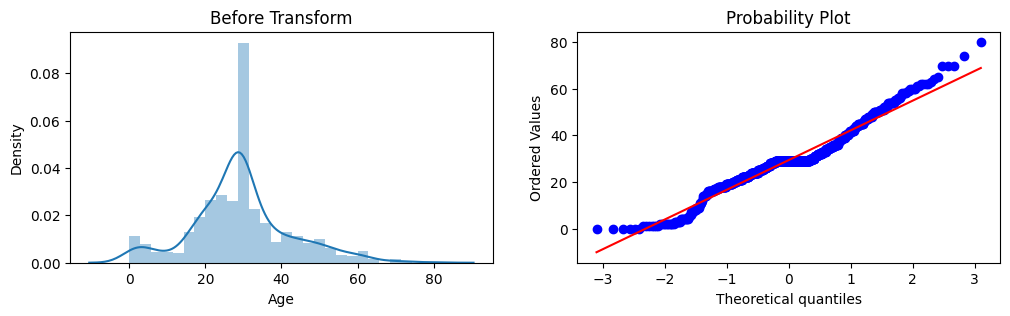

In [97]:
# For Age
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.distplot(a=X_train["Age"])
plt.title("Before Transform")

plt.subplot(122)
stats.probplot(X_train["Age"],plot=plt)
plt.show()

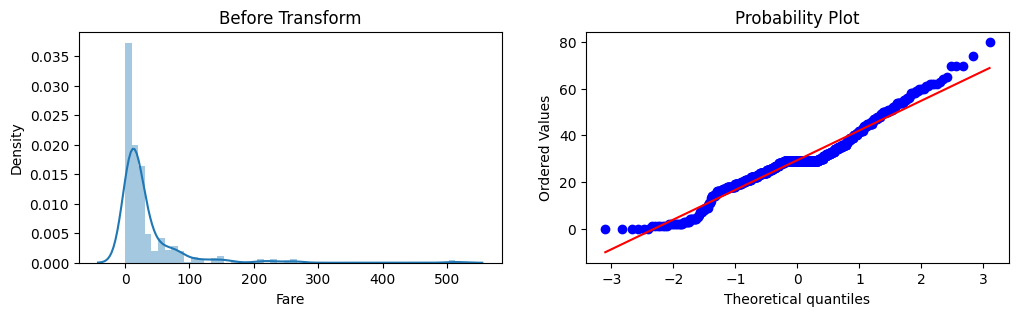

In [101]:
# For Fare

plt.figure(figsize=(12,3))
plt.subplot(121)
sns.distplot(a=X_train["Fare"])
plt.title("Before Transform")

plt.subplot(122)
stats.probplot(X_train["Age"],plot=plt)
plt.show()

### After Transformed

In [98]:
from sklearn.preprocessing import FunctionTransformer

In [102]:
trf = FunctionTransformer(func=np.log1p)

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

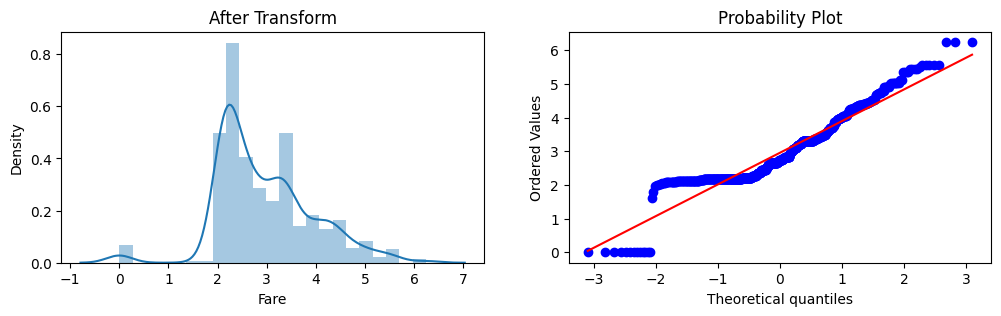

In [105]:
# Age transformed

plt.figure(figsize=(12,3))
plt.subplot(121)
sns.distplot(a=X_train_transformed["Fare"])
plt.title("After Transform")

plt.subplot(122)
stats.probplot(x=X_train_transformed["Fare"],plot=plt)
plt.show()

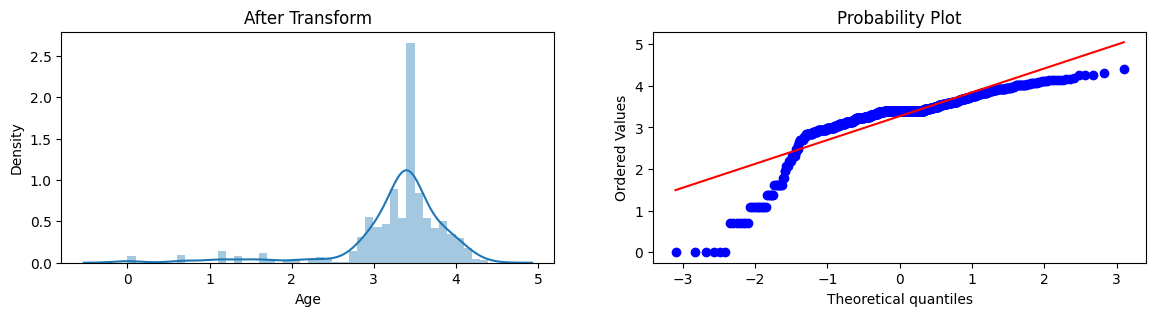

In [110]:
# Fare Transformed

plt.figure(figsize=(14,3))
plt.subplot(121)
sns.distplot(a=X_train_transformed["Age"])
plt.title("After Transform")

plt.subplot(122)
stats.probplot(x=X_train_transformed["Age"],plot=plt)
plt.show()

### Model performance after transformed

In [107]:
dtc = DecisionTreeClassifier()
lgr = LogisticRegression()

dtc.fit(X_train_transformed,y_train)
y_pred = dtc.predict(X_test_transformed)
accuracy_score(y_pred,y_test)

0.6703910614525139

In [108]:
lgr.fit(X_train_transformed,y_train)
y_pred = lgr.predict(X_test_transformed)
accuracy_score(y_pred,y_test)

0.6815642458100558

### Different Function Transformed 

In [131]:
def apply_transform(x):

    trf1 = FunctionTransformer(func=x)
    X_train_transformed1 = trf1.fit_transform(X_train)
    X_test_transformed1 = trf1.transform(X_test)

    lgr.fit(X_train_transformed1,y_train)
    y_pred1 = lgr.predict(X_test_transformed1)
    print(accuracy_score(y_pred1,y_test))

    plt.figure(figsize=(14,3))
    plt.subplot(121)
    stats.probplot(x=X_train["Fare"],plot=plt)

    plt.subplot(122)
    stats.probplot(x=X_train_transformed1["Fare"],plot=plt)
    plt.show()

0.6815642458100558


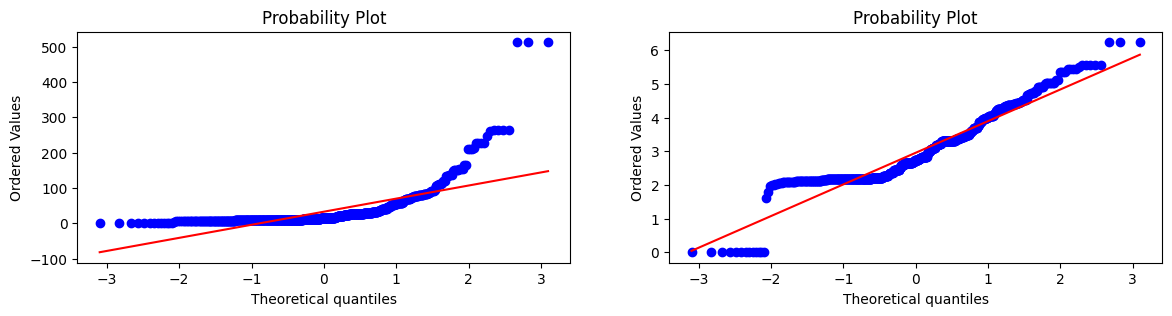

In [143]:
apply_transform(np.log1p)
# lambda x: x**2
x: x**1/2
